In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import multivariate_normal as mvn

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
plt.style.use('fivethirtyeight')

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize


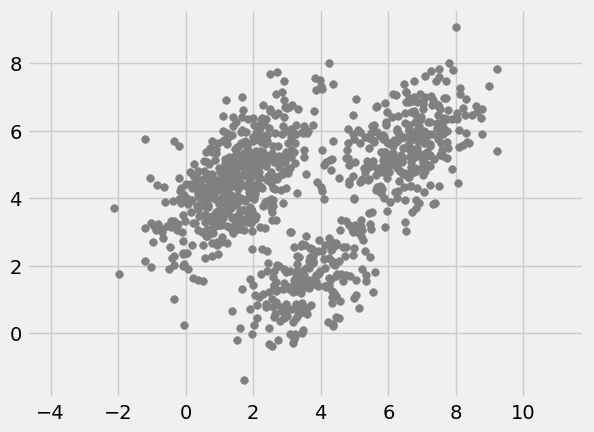

In [2]:
# Convert DataFrame to NumPy array
X = pd.read_csv("synthetic_dataset.csv").to_numpy()

X1 = X[:, 0]
X2 = X[:, 1]
plt.scatter(X1, X2, c='grey', s=30)
plt.axis('equal')
plt.show()

# GMM should produce something similar

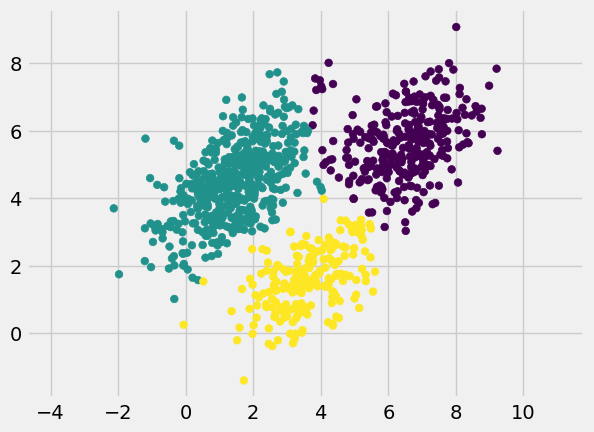

array([[6.4725251 , 5.63857204],
       [1.44687495, 4.47850132],
       [3.58073264, 1.54681139]])

In [3]:
kmeans_test = KMeans(n_clusters= 3, init="k-means++", max_iter=500, algorithm = 'lloyd')
fitted = kmeans_test.fit(X)
prediction = kmeans_test.predict(X)
plt.scatter(X1, X2, c=prediction, s=30)
plt.axis('equal')
plt.show()

kmeans_test.cluster_centers_

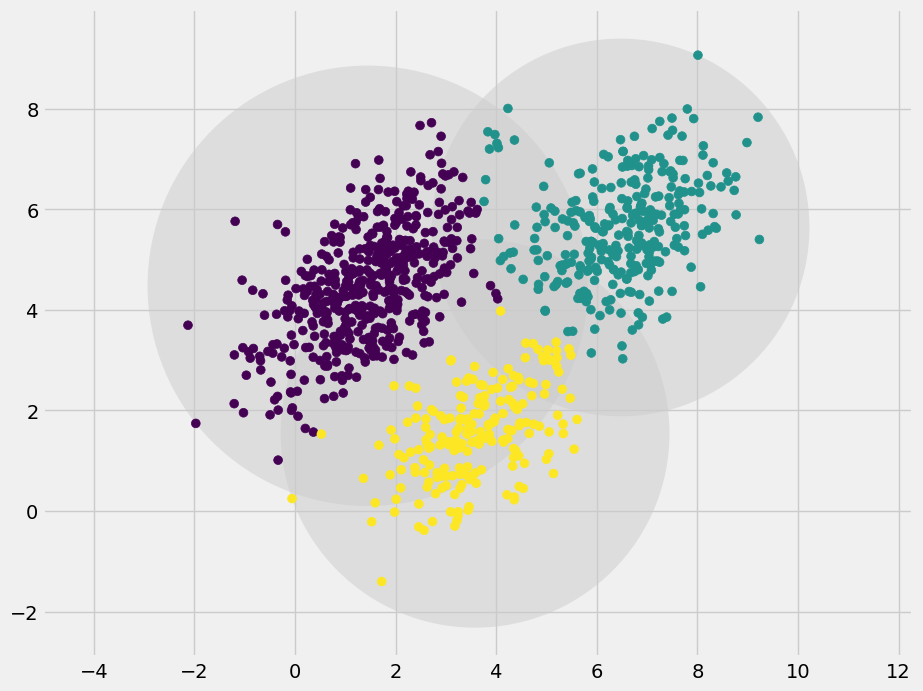

In [4]:
plt.figure(figsize = (10,8))
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X1, X2, c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
plot_kmeans(kmeans_test, X)

# GMM sklearn

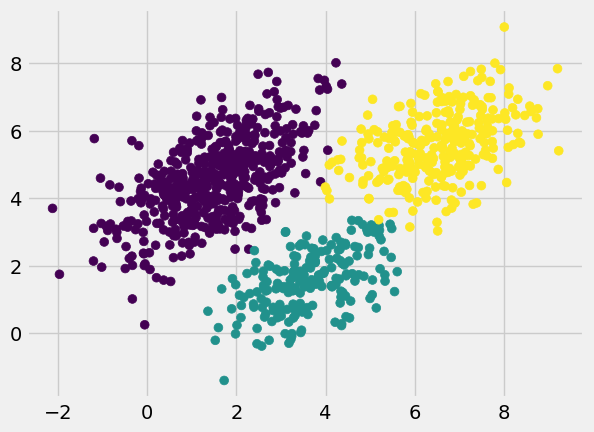

In [5]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X1, X2, c=labels, s=40, cmap='viridis');
probs = gmm.predict_proba(X)

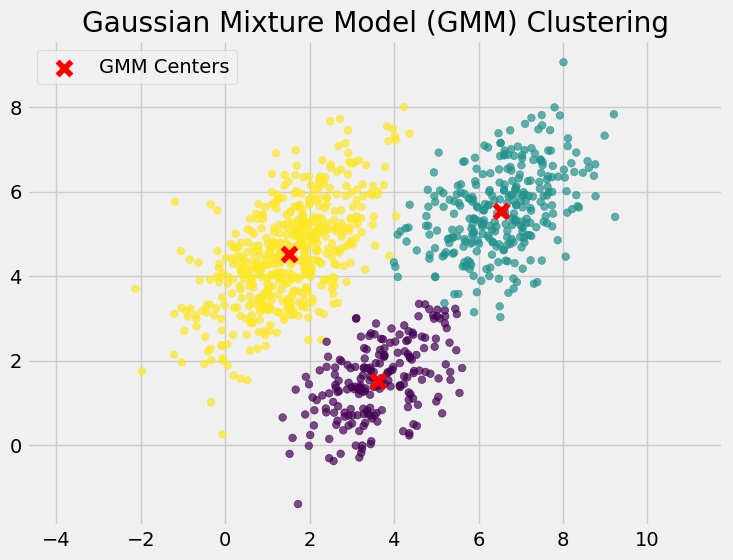

Cluster Means:
 [[3.61030257 1.51724121]
 [6.52487258 5.54975926]
 [1.50115087 4.51258434]]
Cluster Covariances:
 [[[0.91857644 0.44845407]
  [0.44845407 0.80469203]]

 [[1.05489527 0.47246706]
  [0.47246706 1.0550693 ]]

 [[1.22145296 0.78713599]
  [0.78713599 1.4323645 ]]]
Mixing Coefficients (π):
 [0.20331987 0.2945737  0.50210643]


In [6]:
# Fit GMM with 3 clusters
n_components = 3
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict cluster assignments
gmm_labels = gmm.predict(X)

# Extract GMM parameters
gmm_means = gmm.means_  # Cluster centers
gmm_covariances = gmm.covariances_  # Covariance matrices
gmm_weights = gmm.weights_  # Mixing coefficients

# Scatter plot of clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=30, alpha=0.7)
plt.scatter(gmm_means[:, 0], gmm_means[:, 1], 
            c='red', marker='x', s=100, label='GMM Centers')
plt.axis('equal')
plt.title("Gaussian Mixture Model (GMM) Clustering")
plt.legend()
plt.show()

# Print GMM parameters
print("Cluster Means:\n", gmm_means)
print("Cluster Covariances:\n", gmm_covariances)
print("Mixing Coefficients (π):\n", gmm_weights)

In [7]:
# Credit to python data science handbook for the code to plot these distributions

# Function to draw ellipses representing Gaussian components
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):  # Full covariance matrix
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))  # Compute rotation angle
        width, height = 2 * np.sqrt(s)  # Scale eigenvalues
    else:  # If covariance is diagonal
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw ellipses at different confidence levels (1σ, 2σ, 3σ)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs))
        

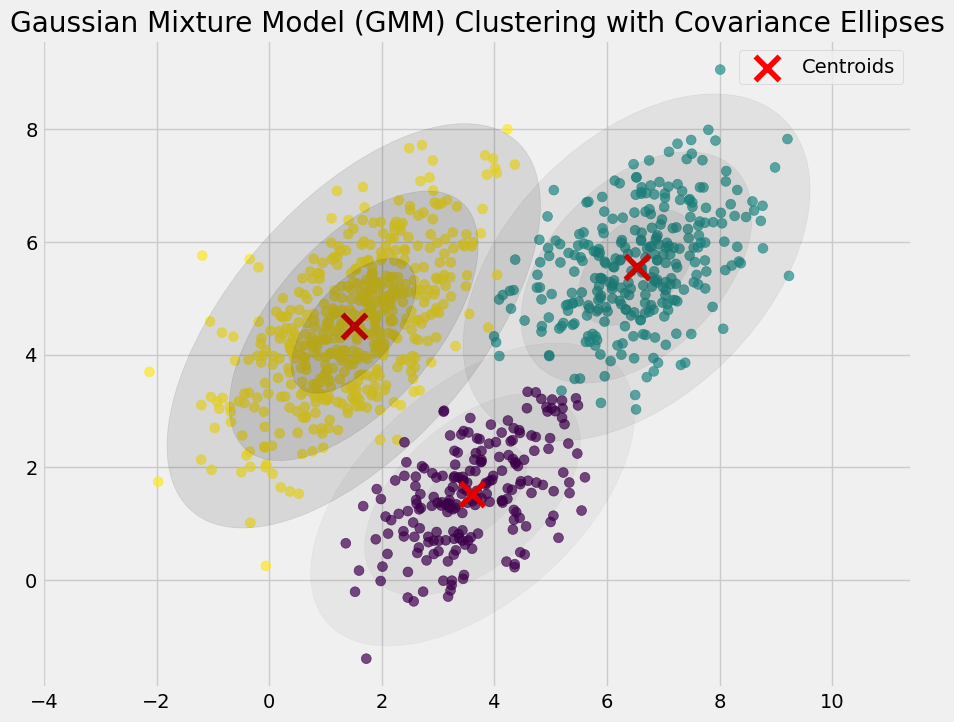

In [8]:
# Plot the GMM clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=300, marker='x', label='Centroids')

# Draw Gaussian ellipses
w_factor = 0.1 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor, color='black')

plt.axis('equal')
plt.title("Gaussian Mixture Model (GMM) Clustering with Covariance Ellipses")
plt.legend()
plt.show()
